In [1]:
import os
import sys
import glob
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
os.chdir('/mnt/BioAdHoc/Groups/vd-ay/kfetter/hichip-db-loop-calling')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('max_colwidth', 400)

In [2]:
sample = "CD34+-Cord-Blood.GSE165207.Homo_Sapiens.H3K27ac.b1"

In [3]:
loops_hicpro = "results/revisions/alignment_comparison/loops/{s}/apa/hicpro_FitHiChIP-S5.interactions_FitHiC_Q0.01.bed".format(s = sample)
loops_distiller = "results/revisions/alignment_comparison/loops/{s}/apa/distiller_FitHiChIP-S5.interactions_FitHiC_Q0.01.bed".format(s = sample)
loops_juicer = "results/revisions/alignment_comparison/loops/{s}/apa/juicer_FitHiChIP-S5.interactions_FitHiC_Q0.01.bed".format(s = sample)

In [4]:
def get_distances(file):
    distances = []
    with open(file) as f:
        for line in f:
            info = line.strip().split("\t")
            distances.append(int(int(info[4]) - int(info[1])))
    return np.array(distances)

In [5]:
dist_hicpro = get_distances(loops_hicpro)
dist_distiller = get_distances(loops_distiller)
dist_juicer = get_distances(loops_juicer)

Text(0.5, 0, 'Loop Distance (bp)')

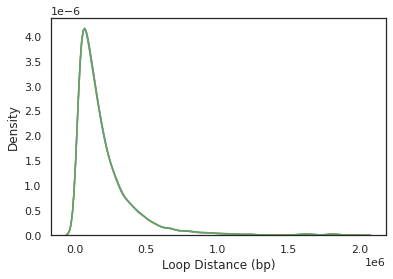

In [15]:
sns.set(style="white")
sns.kdeplot(dist_hicpro)
sns.kdeplot(dist_distiller)
sns.kdeplot(dist_juicer)
plt.xlabel('Loop Distance (bp)')

In [12]:
df_describe = pd.DataFrame(dist_hicpro)
df_describe.describe()

,0
count,4.152200e+04
mean,2.061470e+05
std,2.278591e+05
min,2.000000e+04
25%,7.000000e+04
50%,1.400000e+05
75%,2.550000e+05
max,1.995000e+06


In [13]:
df_describe = pd.DataFrame(dist_distiller)
df_describe.describe()

,0
count,4.313100e+04
mean,2.069600e+05
std,2.271260e+05
min,2.000000e+04
25%,7.000000e+04
50%,1.400000e+05
75%,2.600000e+05
max,1.995000e+06


In [14]:
df_describe = pd.DataFrame(dist_juicer)
df_describe.describe()

,0
count,4.414700e+04
mean,2.077325e+05
std,2.276326e+05
min,2.000000e+04
25%,7.000000e+04
50%,1.400000e+05
75%,2.600000e+05
max,1.995000e+06
